# Genetic Algorithm

_Demonstrating genetic algorithm by taking a suitable data for any simple application._

This is based on standard Hello Word Genetic Algorithm for a simple optimization problem written by Ahmed Gad, researcher, author and creator of popular Python library called PyGAD. Required changes were made to make this more relevant to the need.

In this optimization problem, coefficents of a below mentiond linear quation is found using genetic algorithm technique such that it maximizes the function.

$$ y = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + w_6x_6 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def fitness(variables, population):
    """
    Calculates the fitness of each solution in the current population by
    performing linear combination of variables and respective coefficients.
    """
    
    fitness = np.sum(population * variables, axis=1)
    
    return fitness

In [3]:
def select_mating_pool(population, fitness, n_parents):
    """
    Selecting the best individuals in the current generation as parents to 
    produce offsprings for the next generation.
    """
    
    # Creates a placeholder for parents
    parents = np.empty((n_parents, population.shape[1]))  # shape[1] indicates number of genes in chromosome
    
    for parent_idx in range(n_parents):
        # Gets index for best fitness for solutions in population
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]

        # Copies the best solution to parents selection
        parents[parent_idx, :] = population[max_fitness_idx, :]
        
        # Sets fitness for the best solution to a very low value so that
        # it does not get selected during the search for next best solution
        fitness[max_fitness_idx] = -99999999999
    
    return parents

In [4]:
def crossover(parents, n_offspring):
    """
    Performs crossover between pairs of parents and produces desired number of offsprings
    """
    
    # Creates a placeholder for offsprings
    offsprings = np.empty((n_offspring, parents.shape[1]))
    
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = np.uint8(parents.shape[1]/2)

    # Loops over to create each offspring
    for k in range(n_offspring):
        # Gets indexes for first and second parent to mate
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        
        # The new offspring will have its first half of its genes taken from the first parent and
        # its second half of its genes taken from the second parent.
        offsprings[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offsprings[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    
    return offsprings

In [5]:
def mutate(offsprings, n_mutations = 1):
    """
    Performs mutation on the offsprings by making randome changes to the given number of genes selected randomly.
    """
    
    # Counter that helps to select genes uniformly from the offspring's chromosome
    mutations_counter = np.uint8(offsprings.shape[1] / n_mutations)
    
    # Loops to mutate each offspring
    for idx in range(offsprings.shape[0]):
        
        # Changes one or more genes in a specific offspring
        gene_idx = mutations_counter - 1
        
        for mutation_num in range(n_mutations):
            # Changes a specific gene with a random number
            offsprings[idx, gene_idx] = offsprings[idx, gene_idx] + np.random.uniform(-1.0, 1.0, 1)
            
            # Calculates the index of next gene in case of multiple mutations in a offspring 
            gene_idx = gene_idx + mutations_counter
    
    return offsprings

## Applying Genetic Algorithm

Let's consider the following values for variables $x_1$ through $x_6$ in above mentioned function to maximize its value.

### Initialization

In [6]:
# Sets values for variable x1 through x6
variables = [4, -2, 3.5, 5, -11, -4.7]

# Also, number of coefficients will be equal to the number of variables in the linear combination problem.
n_coef = len(variables)

In [7]:
# Initializing population

# Number of solutions (a set of coefficients in this problem) in the population
population_size = 8

# Initialize population with uniform random numbers that range between -4 and +4.
population = np.random.uniform(low=-4.0, high=4.0, size=(population_size, n_coef))

# Prints the initialized population
print(population)

[[ 0.14070606 -0.20750525 -0.10530911 -3.55660854  2.26417944 -3.380455  ]
 [ 0.09551454 -3.25065737 -1.63783578  2.13474323  2.33008347 -0.17435979]
 [-0.13301553  0.41446451 -3.2670737  -0.08856087 -1.65757127  3.73312907]
 [ 1.68685324 -0.7871644  -0.30002228 -2.24190471  1.91335847 -1.92048969]
 [-3.60050433  1.94097292  3.34448144  2.5152903   0.0311665   3.4243841 ]
 [ 0.81710824 -2.04651591  3.24075124  1.22029881  2.56698667  1.85363599]
 [ 3.53838962  0.26518607 -3.26461652  3.60327781  0.00689728  1.1194216 ]
 [-3.01400495 -2.7842779   3.02575181 -0.73204802 -0.16804654  3.44654076]]


### Creating Generations

In [8]:
# Sets number of generations to experiment
n_generations = 5

# Sets number of parents required to create offsprings
n_parents = 4

In [9]:
# Now, checks for fitness of each individual (or solution or hypothesis) in the initial generation
fitness_values = fitness(variables, population)
print("Fitness Values in Initial Generation:", "\n", fitness_values, "\n")

Fitness Values in Initial Generation: 
 [-26.19162525 -12.98676341 -12.55097615 -15.95850144 -10.4392634
 -12.14335437  14.87626595 -13.90780239] 



In [10]:
# Stores fitness value of best solution from each generation
best_fitness_values = []

# Stores fitness value of the best solution from the initial population
best_fitness_values.append(np.max(fitness_values))

In [11]:
# Iterates to create generations

for generation in range(n_generations):
    print("Generation: ", generation + 1)
    print("="*20, "\n")
    
    # Selects parents from the population to mating to produce offspring    
    parents = select_mating_pool(population, fitness_values, n_parents)
    print("Selected Parents:", "\n", parents, "\n")
    
    # Parents create offsprings in crossover process
    offsprings = crossover(parents, population.shape[0] - parents.shape[0])
    
    print("Crossover: Offsprings", "\n", offsprings, "\n")
    
    mutated_offsprings = mutate(offsprings)
    print("Mutated:", "\n", mutated_offsprings, "\n")
    
    # Creates new population with parents and mutated offsprings
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = mutated_offsprings
    
    # Checks for fitness of each individual (or solution or hypothesis) in the new generation
    fitness_values = fitness(variables, population)
    print("Fitness Values in New Generation :", "\n", fitness_values, "\n")
    
    # Appends best fitness value againt the (index of) generation
    best_fitness_values.append(np.max(fitness_values))

Generation:  1

Selected Parents: 
 [[ 3.53838962  0.26518607 -3.26461652  3.60327781  0.00689728  1.1194216 ]
 [-3.60050433  1.94097292  3.34448144  2.5152903   0.0311665   3.4243841 ]
 [ 0.81710824 -2.04651591  3.24075124  1.22029881  2.56698667  1.85363599]
 [-0.13301553  0.41446451 -3.2670737  -0.08856087 -1.65757127  3.73312907]] 

Crossover: Offsprings 
 [[ 3.53838962  0.26518607 -3.26461652  2.5152903   0.0311665   3.4243841 ]
 [-3.60050433  1.94097292  3.34448144  1.22029881  2.56698667  1.85363599]
 [ 0.81710824 -2.04651591  3.24075124 -0.08856087 -1.65757127  3.73312907]
 [-0.13301553  0.41446451 -3.2670737   3.60327781  0.00689728  1.1194216 ]] 

Mutated: 
 [[ 3.53838962  0.26518607 -3.26461652  2.5152903   0.0311665   3.97165666]
 [-3.60050433  1.94097292  3.34448144  1.22029881  2.56698667  1.52614255]
 [ 0.81710824 -2.04651591  3.24075124 -0.08856087 -1.65757127  4.18914118]
 [-0.13301553  0.41446451 -3.2670737   3.60327781  0.00689728  0.30806871]] 

Fitness Values in Ne

In [12]:
# From the latest generation, finds index of solution that got highest fitness
best_solution_idx = np.where(fitness_values == np.max(fitness_values))
best_solution = population[best_solution_idx, :]

In [13]:
print("Best Solution after Generation", n_generations, "is:", best_solution)

Best Solution after Generation 5 is: [[[ 0.81710824 -2.04651591  3.24075124  3.60327781  0.00689728
   -1.0396121 ]]]


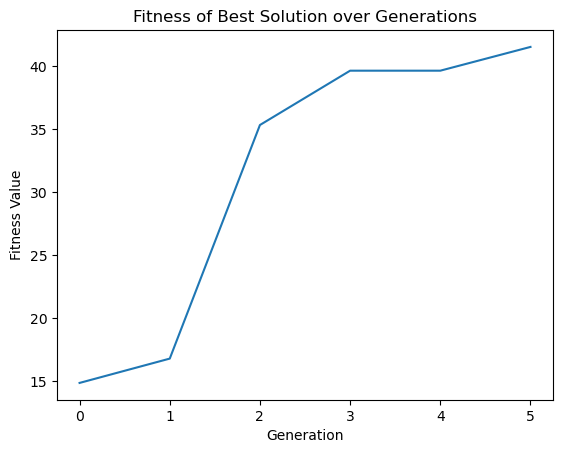

In [14]:
# Plots best fitness over generations

plt.plot(best_fitness_values)
plt.xlabel("Generation")
plt.ylabel("Fitness Value")
plt.title("Fitness of Best Solution over Generations")
plt.show()

As shown in the plot above, highest fitness value amongst all solutions in a generation has got consistent increment over subsequent generations build through processes such as parent selection, crossover and mutation.